<a href="https://colab.research.google.com/github/kevinbrnett/Classification-Project/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 

## Data Dictionary:
1. id: unique identifier (int)
2. gender: "Male", "Female" or "Other" (object)
3. age: age of the patient (int)
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension (int)
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease (int)
6. ever_married: "No" or "Yes" (object)
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (object)
8. Residence_type: "Rural" or "Urban" (object)
9. avg_glucose_level: average glucose level in blood (int)
10. bmi: body mass index (int)
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* (object)
12. stroke: 1 if the patient had a stroke or 0 if not (int)

## Import Libraries

In [13]:
# Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data Set

In [14]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [15]:
# Load Data
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Data Sets/healthcare-dataset-stroke-data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
df.shape

(5110, 12)

> There are 5110 rows and 12 columns

## Data Cleaning

In [17]:
# Inspect Data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
# Delete Unnecessary Columns
df.drop(columns='id',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


> The 'id' column was removed since it was a unique identifier to each row.

In [21]:
# Check for Duplicated Rows
df.duplicated().sum()

0

> There are no duplicated rows to be dealt with.

In [23]:
# Find Missing Values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [24]:
# Deal with Missing Values
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

In [26]:
# Confirm Missing Values were Filled
df.isna().sum().sum()

0

> There are 201 missing values in the 'bmi' column which is 3.9% of data missing in the column. These values were dealt with by filling the missing values with the mean of the column.

In [27]:
# Checking the Data Types Compared to Data Dictionary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


> All data types match the data dictionary.

In [32]:
# Identify Inconsistencies in Categorical Values
for i in df.select_dtypes(include='object'):
  count = df[i].value_counts()
  print(count)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [35]:
df['work_type'].replace('children', 'Children', inplace=True)
df['work_type'].value_counts()

Private          2925
Self-employed     819
Children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [39]:
df['smoking_status'].replace({'never smoked': 'Never Smoked', 'formerly smoked': 'Formerly Smoked', 'smokes': 'Smokes'}, inplace=True)
df['smoking_status'].value_counts()

Never Smoked       1892
Unknown            1544
Formerly Smoked     885
Smokes              789
Name: smoking_status, dtype: int64

In [40]:
# Inspect Data for Impossible Values
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Univariate Visuals to Identify Outliers

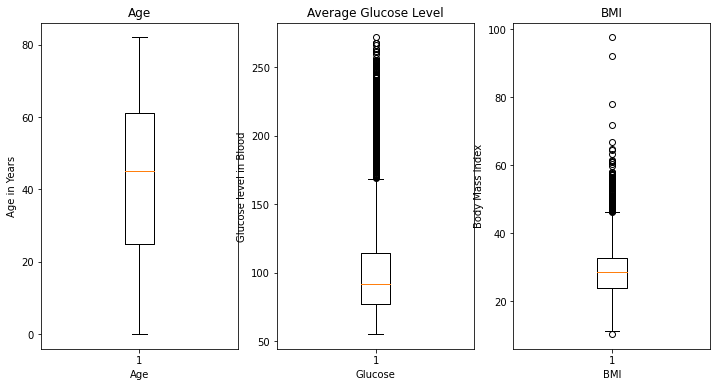

In [51]:
# Subplots for Boxplots for Numerical Outliers
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12,6));
# Subplot 1 
axes[0].boxplot(df['age'])
axes[0].set_title('Age')
axes[0].set_ylabel('Age in Years');
axes[0].set_xlabel('Age');
# Subplot 2
axes[1].boxplot(df['avg_glucose_level'])
axes[1].set_title('Average Glucose Level')
axes[1].set_ylabel('Glucose level in Blood');
axes[1].set_xlabel('Glucose');
# Subplot 3
axes[2].boxplot(df['bmi'])
axes[2].set_title('BMI')
axes[2].set_ylabel('Body Mass Index');
axes[2].set_xlabel('BMI');